## 05. [19032024] Position of a quasar
You measure the position of a quasar $N$ times with the same telescope (homoscedastic). The underlying process is Gaussian, the true position id $\mu = 1$ in suitable units, the errors are $\sigma = 0.2$

In [2]:
import numpy as np
import itertools
from matplotlib import pyplot as plt
from scipy import stats, interpolate
from astropy.visualization import hist

In [3]:
def gaussian(x, mu, sigma): 
    p = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return p

### Part 1

The maximum likelihood solution is:  0.9139139139139139
The true MLE is the arithmetic mean of the measurements:  0.9126309769328966


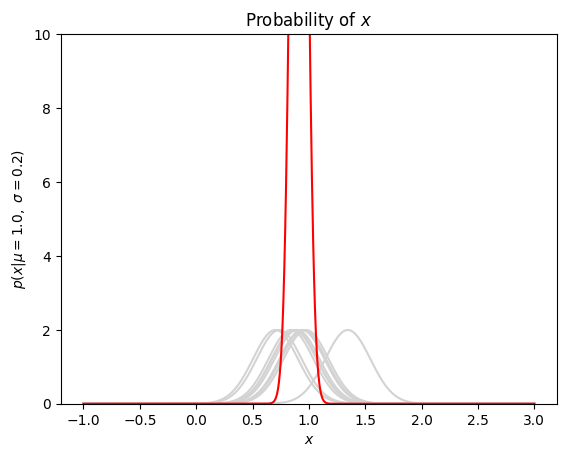

In [5]:
N = 10
mu = 1.
sigma = 0.2

# generate N random measurements of the position
data = np.random.normal(mu, sigma, N) 

#plot the probability for each data point
x = np.linspace(-1,3, 1000)

L = []
fig, ax = plt.subplots()
for measurement in data:
    ax.plot(x, gaussian(x, measurement, sigma), color='lightgrey')
    if len(L) == 0: L = gaussian(x, measurement, sigma)
    else: L *= gaussian(x, measurement, sigma)

ax.plot(x, L, color='red')

ax.set_ylim(0, 10)
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x| \mu=1.0,\ \sigma=0.2$)")
ax.set_title("Probability of $x$")

print("The maximum likelihood solution is: ", x[np.argmax(L)])
true_L = np.sum(data) / N
print("The true MLE is the arithmetic mean of the measurements: ", true_L)

### Part 2

In [ ]:
#differentiating the logL twice check his solution and compare with 

In [26]:
#np.log((1 / (sigma * np.sqrt(2 * np.pi)))**N) - 
lnL = []
for measurement in data:
    if len(lnL) == 0: lnL = -(measurement - mu)**2 / (2 * sigma**2)
    else: lnL += -(measurement - mu)**2 / (2 * sigma**2)

lnL = np.sum((data - mu)**2 / (2 * sigma**2))

#delta theta al quadrato potrebbe essere step nel linspace generato per le x ??? parametro 
#uncertainty = np.sqrt((- np.diff(lnL, n=2) / sigma**2))

ValueError: diff requires input that is at least one dimensional

### Part 3